In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

df = pd.read_csv('bank.csv')

sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

LE=LabelEncoder()
df['deposit']=LE.fit_transform(df.deposit.values)

#encoding categorical features
df=pd.get_dummies(df)
print(df.shape)

#partitioning
for train_index, test_index in sss.split(df.drop("deposit",axis=1), df.deposit):
    traindf=df.loc[train_index]
    testdf= df.loc[test_index]

#partition x/y
xtrain=traindf.drop('deposit', axis=1)
ytrain=traindf.deposit

xtest=testdf.drop('deposit', axis=1)
ytest=testdf.deposit
print(xtrain.shape)
print(xtest.shape)

scaler = StandardScaler()
xtest = scaler.fit_transform(xtest)
xtrain = scaler.fit_transform(xtrain)

pca = PCA(0.9)
xtrain = pca.fit_transform(xtrain)
xtest = pca.fit_transform(xtest)
print(xtrain.shape)
print(xtest.shape)



(11162, 52)
(8929, 51)
(2233, 51)
(8929, 33)
(2233, 33)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 33)                1122      
_________________________________________________________________
dropout (Dropout)            (None, 33)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 33)                1122      
_________________________________________________________________
dropout_1 (Dropout)          (None, 33)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 33)                1122      
_________________________________________________________________
dropout_2 (Dropout)          (None, 33)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6

252/252 [==============================] - 0s 2ms/step - loss: 1.0003 - val_loss: 1.0028
Epoch 62/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0003 - val_loss: 1.0028
Epoch 63/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0003 - val_loss: 1.0027
Epoch 64/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0002 - val_loss: 1.0027
Epoch 65/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0002 - val_loss: 1.0027
Epoch 66/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0002 - val_loss: 1.0027
Epoch 67/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0001 - val_loss: 1.0026
Epoch 68/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0001 - val_loss: 1.0026
Epoch 69/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0001 - val_loss: 1.0026
Epoch 70/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0001 - val_loss: 

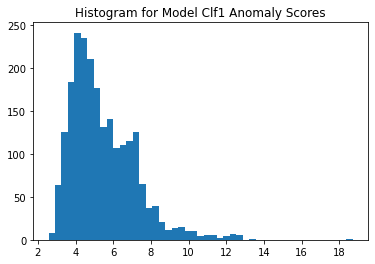

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.209093,-0.312635,1.214318,0.555501,-0.042558,1.648178,0.435323,0.647107,0.037273,1.798863,...,-1.237660,0.035183,1.600722,1.329541,-0.525543,-0.076821,1.377121,1.323742,0.876080,11.483888
1,-0.028260,0.007307,-0.028382,-0.012984,0.000995,-0.038523,-0.010175,-0.015125,-0.000871,-0.042045,...,0.028928,-0.000822,-0.037414,-0.031075,0.012284,0.001796,-0.032188,-0.030940,-0.020477,5.330847


In [2]:
clf1 = AutoEncoder(hidden_neurons =[33, 2, 2, 33])
clf1.fit(xtrain)
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(xtest)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(xtest)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(xtest)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(xtest)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()
df_test = pd.DataFrame(xtest)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']>10, 0, 1)
df_test['cluster'].value_counts()
df_test.groupby('cluster').mean()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 33)                1122      
_________________________________________________________________
dropout_6 (Dropout)          (None, 33)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 33)                1122      
_________________________________________________________________
dropout_7 (Dropout)          (None, 33)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 33)                1122      
_________________________________________________________________
dropout_8 (Dropout)          (None, 33)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)               

252/252 [==============================] - 0s 2ms/step - loss: 1.0025 - val_loss: 0.9855
Epoch 59/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0024 - val_loss: 0.9855
Epoch 60/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0024 - val_loss: 0.9855
Epoch 61/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0023 - val_loss: 0.9854
Epoch 62/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0023 - val_loss: 0.9854
Epoch 63/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0023 - val_loss: 0.9853
Epoch 64/100
252/252 [==============================] - 1s 2ms/step - loss: 1.0022 - val_loss: 0.9853
Epoch 65/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0022 - val_loss: 0.9853
Epoch 66/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0022 - val_loss: 0.9853
Epoch 67/100
252/252 [==============================] - 0s 2ms/step - loss: 1.0021 - val_loss: 

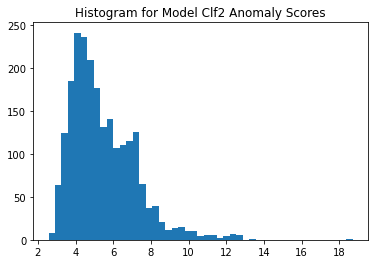

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.209093,-0.312635,1.214318,0.555501,-0.042558,1.648178,0.435323,0.647107,0.037273,1.798863,...,-1.237660,0.035183,1.600722,1.329541,-0.525543,-0.076821,1.377121,1.323742,0.876080,11.483809
1,-0.028260,0.007307,-0.028382,-0.012984,0.000995,-0.038523,-0.010175,-0.015125,-0.000871,-0.042045,...,0.028928,-0.000822,-0.037414,-0.031075,0.012284,0.001796,-0.032188,-0.030940,-0.020477,5.330853


In [3]:
clf2 = AutoEncoder(hidden_neurons =[33, 16, 2, 16, 33])
clf2.fit(xtrain)
y_train_scores = clf2.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf2.predict(xtest)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(xtest)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

y_train_scores = clf2.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf2.predict(xtest)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(xtest)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()
df_test = pd.DataFrame(xtest)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']>10, 0, 1)
df_test['cluster'].value_counts()
df_test.groupby('cluster').mean()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 33)                1122      
_________________________________________________________________
dropout_13 (Dropout)         (None, 33)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 33)                1122      
_________________________________________________________________
dropout_14 (Dropout)         (None, 33)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 33)                1122      
_________________________________________________________________
dropout_15 (Dropout)         (None, 33)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)               

252/252 [==============================] - 1s 2ms/step - loss: 0.9984 - val_loss: 1.0242
Epoch 54/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9983 - val_loss: 1.0242
Epoch 55/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9983 - val_loss: 1.0241
Epoch 56/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9982 - val_loss: 1.0241
Epoch 57/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9981 - val_loss: 1.0240
Epoch 58/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9981 - val_loss: 1.0240
Epoch 59/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9980 - val_loss: 1.0239
Epoch 60/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9980 - val_loss: 1.0239
Epoch 61/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9980 - val_loss: 1.0239
Epoch 62/100
252/252 [==============================] - 0s 2ms/step - loss: 0.9979 - val_loss: 

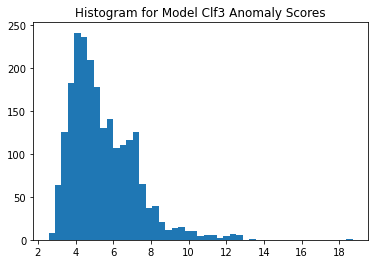

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.209093,-0.312635,1.214318,0.555501,-0.042558,1.648178,0.435323,0.647107,0.037273,1.798863,...,-1.237660,0.035183,1.600722,1.329541,-0.525543,-0.076821,1.377121,1.323742,0.876080,11.483979
1,-0.028260,0.007307,-0.028382,-0.012984,0.000995,-0.038523,-0.010175,-0.015125,-0.000871,-0.042045,...,0.028928,-0.000822,-0.037414,-0.031075,0.012284,0.001796,-0.032188,-0.030940,-0.020477,5.330830


In [4]:
clf3 = AutoEncoder(hidden_neurons =[33, 16, 8, 2, 8, 16, 33])
clf3.fit(xtrain)
y_train_scores = clf3.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf3.predict(xtest)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(xtest)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

y_train_scores = clf3.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf3.predict(xtest)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(xtest)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf3 Anomaly Scores")
plt.show()
df_test = pd.DataFrame(xtest)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']>10, 0, 1)
df_test['cluster'].value_counts()
df_test.groupby('cluster').mean()

In [5]:
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(xtest),
                             'clf2': clf2.decision_function(xtest),
                             'clf3': clf3.decision_function(xtest) 
                            })

from pyod.utils.utility import standardizer
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)



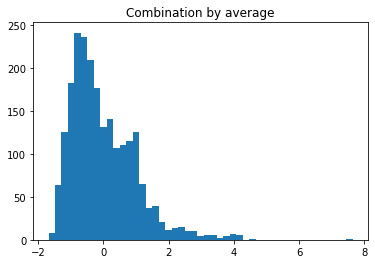

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,,,,,,,,,,
0,1.143231,-0.722856,1.388728,0.553246,-0.093456,1.324666,0.411110,0.592688,0.009567,2.013692,...,-1.257266,0.465280,1.321144,0.697031,-0.999653,0.292846,1.450986,1.761443,1.462686,3.808228
1,-0.017676,0.011176,-0.021472,-0.008554,0.001445,-0.020481,-0.006356,-0.009164,-0.000148,-0.031135,...,0.019439,-0.007194,-0.020427,-0.010777,0.015456,-0.004528,-0.022435,-0.027235,-0.022615,-0.062258


In [6]:
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()


df_test = pd.DataFrame(xtest)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']>3, 0, 1)
df_test['y_by_average_cluster'].value_counts()
df_test.groupby('y_by_average_cluster').mean()

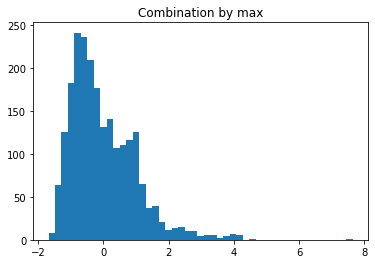

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,,,,,,,,,
0,1.143231,-0.722856,1.388728,0.553246,-0.093456,1.324666,0.411110,0.592688,0.009567,2.013692,...,-1.257266,0.465280,1.321144,0.697031,-0.999653,0.292846,1.450986,1.761443,1.462686,3.808460
1,-0.017676,0.011176,-0.021472,-0.008554,0.001445,-0.020481,-0.006356,-0.009164,-0.000148,-0.031135,...,0.019439,-0.007194,-0.020427,-0.010777,0.015456,-0.004528,-0.022435,-0.027235,-0.022615,-0.062031


In [7]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

df_test = pd.DataFrame(xtest)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']>3, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()
df_test.groupby('y_by_maximization_cluster').mean()